# CS 424 - Assignment 4
## Group: Player One
### Members: Shiladitya Singh Bhati, Divyal Desle, and Ananya Mate


#### Data cleaning:

In [12]:
# Importing pandas, geopandas, etc
import geopandas as gpd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import vega as vega
from vega import VegaLite
from vega.widget import VegaWidget
import altair as alt
import json

### Visualization 1:

In [13]:
df_vis1 = pd.read_csv('vis5.csv')
df_vis1 = df_vis1[(df_vis1['VEHICLE_YEAR'] <= 2024) & (df_vis1['VEHICLE_YEAR'] >= 2000)]


In [14]:
vis1_spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v4.json",
    
  "data": {"values": df_vis1},
    
  "title": "Crash Data - Vehicle Year Distribution",
  "vconcat": [
    {
      "width": 600,
      "height": 300,
      "mark": "bar",
      "encoding": {
        "x": {
          "field": "VEHICLE_YEAR",
          "title": "Vehicle Year",
          "type": "ordinal",
          "axis": {"labelAngle": 0},
          "sort": {"field": "VEHICLE_YEAR", "order": "ascending"}
        },
        "y": {
          "field": "OCCUPANT_CNT",
          "type": "quantitative",
          "title": "Occupant Count"
        },
        "color": {
          "field": "VEHICLE_TYPE",
          "type": "nominal",
          "scale": {"scheme": "category20"},
          "sort": "-y"
        },
        "tooltip": [
          {"field": "VEHICLE_TYPE", "title": "Vehicle Type"},
          {"field": "VEHICLE_YEAR", "title": "Vehicle Year"}
        ]
      }
    },
    {
      "width": 600,
      "height": 300,
      "mark": "bar",
      "encoding": {
        "x": {"field": "VEHICLE_TYPE", "title": "Vehicle Type", "type": "nominal"},
        "y": {"aggregate": "count", "field": "NUM_PASSENGERS", "title": "Num Passengers"},
        "color": {"field": "VEHICLE_YEAR", "title": "Vehicle Year", "type": "ordinal"}
      },
    "selection": {
    "Choose": {
      "type": "single",
      "fields": ["VEHICLE_YEAR"],
      "bind": {"input": "select", "options": [2001,
                                              2002,
                                              2003,
                                              2004,
                                              2005,
                                              2006,
                                              2007,
                                              2008,
                                              2009,
                                              2010,
                                              2011,
                                              2012,
                                              2013,
                                              2014,
                                              2015,
                                              2016,
                                              2017,
                                              2018,
                                              2019,
                                              2020,
                                             ]}
        }
    },
        "transform": [
    {"filter": {"selection": "Choose"}}
  ]
}
  ]}

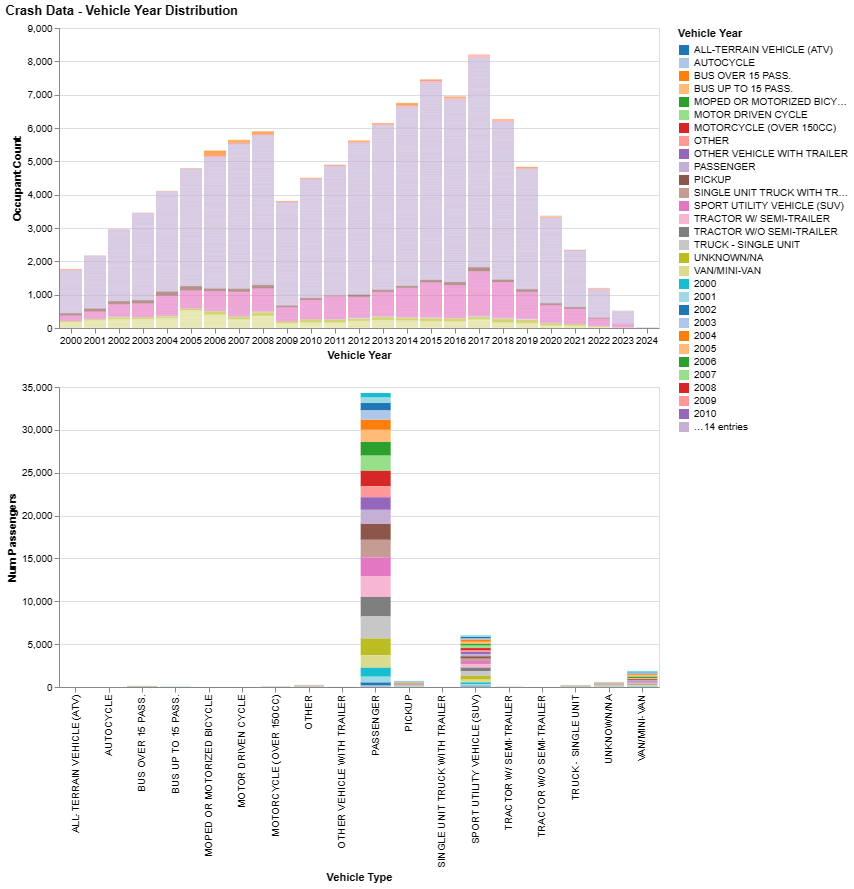

In [15]:
VegaLite(spec = vis1_spec, data = df_vis1)

### Visualization 2:

In [16]:
df_vis2 = pd.read_csv('vis2.csv')
df_vis2 = df_vis2[(df_vis2['VEHICLE_YEAR'] <= 2024) & (df_vis2['VEHICLE_YEAR'] >= 2000)]


In [17]:
vis2_spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v4.json",
  "data": {"values": df_vis2},
    
  "mark": "circle",
    "width": 500,
    "height": 500,
  "encoding": {
    "x": {"field": "VEHICLE_YEAR", "type": "nominal"},
    "y": {"field": "NUM_PASSENGERS", "type": "quantitative"},
    "color": {"field": "VEHICLE_TYPE", "type": "nominal"}
  },
    
  "selection": {
    "Choose": {
      "type": "single",
      "fields": ["VEHICLE_TYPE"],
      "bind": {"input": "select", "options": ["MOTORCYCLE (OVER 150CC)",
                                              "VAN/MINI-VAN", 
                                              "SPORT UTILITY VEHICLE (SUV)", 
                                              "3-WHEELED MOTORCYCLE (2 REAR WHEELS)",
                                              "ALL-TERRAIN VEHICLE (ATV)",
                                              "AUTOCYCLE",
                                              "BUS OVER 15 PASS.",
                                              "BUS UP TO 15 PASS.",
                                              "FARM EQUIPMENT",
                                              "MOPED OR MOTORIZED BICYCLE",
                                              "MOTOR DRIVEN CYCLE",
                                              "OTHER",
                                              "OTHER VEHICLE WITH TRAILER",
                                              "PASSENGER",
                                              "PICKUP",
                                              "RECREATIONAL OFF-HIGHWAY VEHICLE (ROV)",
                                              "SINGLE UNIT TRUCK WITH TRAILER",
                                              "SNOWMOBILE",
                                              "TRACTOR W/O SEMI-TRAILER",
                                              "TRACTOR W/ SEMI-TRAILER",
                                              "TRUCK - SINGLE UNIT",
                                             ]}
    }
  },
    
    "transform": [
    {"filter": {"selection": "Choose"}}
  ]
    
}

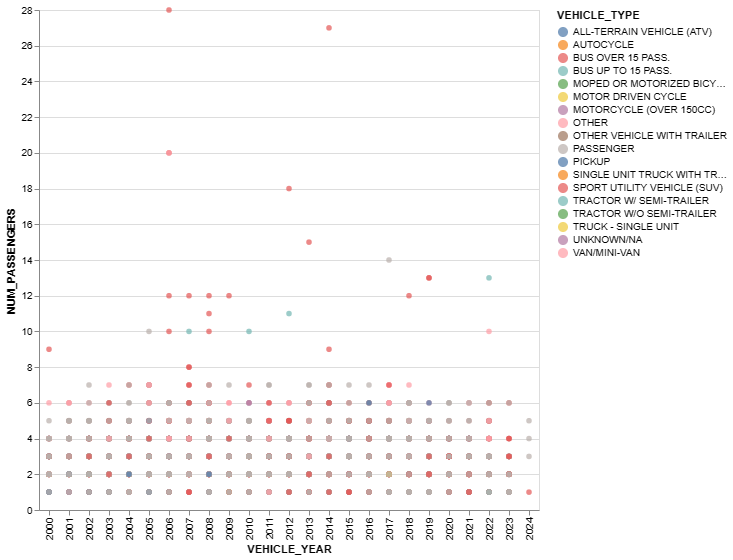

In [18]:
VegaLite(spec = vis2_spec, data = df_vis2)

### Visualization 3:

In [51]:
df_vis4 = pd.read_csv('vis6.csv')


In [56]:

vis4_spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v4.json",
    
  "data": {"values": df_vis4},
    
  "vconcat": [
    {
      "width": 600,
      "height": 300,
      "mark": "tick",
      "encoding": {
        "x": {
          "field": "CRASH_DATE",
          "type": "temporal",
          "title": "Date"
        },
        "y": {
          "aggregate": "count",
          "type": "quantitative",
          "title": "Crash Counts"
        }
      }
    },
    {
      "width": 600,
      "height": 60,
      "mark": "tick",
      "params": [{
        "name": "brush",
        "select": {"type": "interval", "encodings": ["x"]}
      }],
      "encoding": {
        "x": {"field": "CRASH_DATE", "type": "temporal"},
        "y": {
          "aggregate": "count",
          "type": "quantitative",
          "axis": {"tickCount": 3, "grid": False}
        }
      }
    }
  ]
}




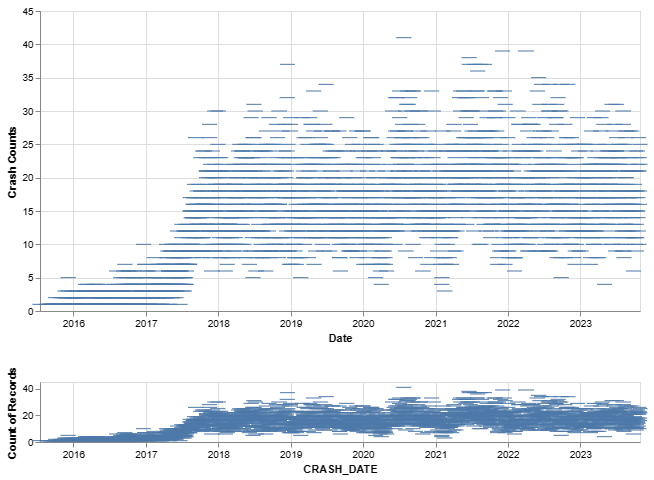

In [57]:
VegaLite(spec = vis4_spec, data = df_vis4)